## An example how to calculate sdg 11.2 indicator for Friedrichshain (Berlin)

This is an example on how to calculate the SDG11.2.1 indicator for the district of Friedrichshain in Berlin (Germany).
We start by importing all necessary libraries and setting our project path to the system paths.


In [1]:
import os
import sys
project_path = os.path.abspath('../')
sys.path.append(project_path)
import geopandas as gpd
import osmnx as ox
from matplotlib import pyplot as plt
from ptac import accessibility as accessibility
from ptac import osm as osm
from ptac import population as population

This is a simple example on how to generate a point geodataframe from a raster data set. In this example we use population data from meta, which can be downloaded here:
https://data.humdata.org/organization/facebook?q=high%20resolution%20population%20density&ext_page_size=100. For this example we downloaded meta population data and clipped it to the bounding boxes of Friedrichshain using QGis clip raster function. The result is this dataset: "/data/friedrichshain_population_raster_meta.tif".

In [3]:
population_points = population.raster_to_points(path=project_path + "/data/friedrichshain_population_raster_meta.tif")


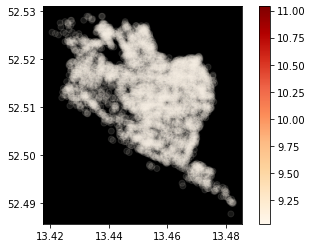

In [4]:
ax = population_points.plot(column= "pop", cmap='OrRd', legend=True, alpha=0.1)
ax.set_facecolor("black")


In [5]:
population_sum = population_points["pop"].sum()

print(f"Overall sum of population is: {population_sum}")

Overall sum of population is: 47607.553269930024


Now, you load the pt stops and the network from disk. See how to download street networks in the friedrichshain_example.ipynb.

In [6]:
stops = gpd.read_file(project_path + "/data/friedrichshain_pt.gpkg")
network_gdf = gpd.read_file(project_path + "/data/friedrichshain_network.gpkg")

After this, you are able to calculate accessiblities.

In [7]:
boundary_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[population_points.unary_union.convex_hull])
accessibility_output= accessibility.distance_to_closest(start_geometries=population_points,
                                  destination_geometries=stops,
                                  boundary_geometries=boundary_gdf,
                                  maximum_distance=500,
                                  network_gdf=network_gdf,
                                  verbose=1)

Street network provided

Preparing street network for routing
Starting UrMoAC to calculate accessibilities

calculation finished in 25.00663800000001 seconds


And afterwards calculate the actual indicator.

In [8]:
sdg = accessibility.calculate_sdg(df_pop_total=population_points,
                                  pop_accessible=accessibility_output,
                                  population_column='pop')
print(f"{sdg} percent of the population have access to the public transit system within 500 meters")


Calculating SDG 11.2. indicator ... 
SDG 11.2.1 indicator is calculated
0.9753372681281619 percent of the population have access to the public transit system within 500 meters
